# Basic classification: Classify images of clothing

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

KeyboardInterrupt: 

In [2]:
# Load Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

In [4]:
train_labels.shape

(60000,)

## Data preprocessing

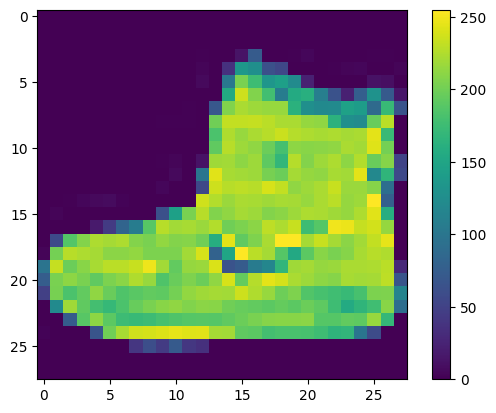

In [5]:
# View image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

### Image Normalization

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

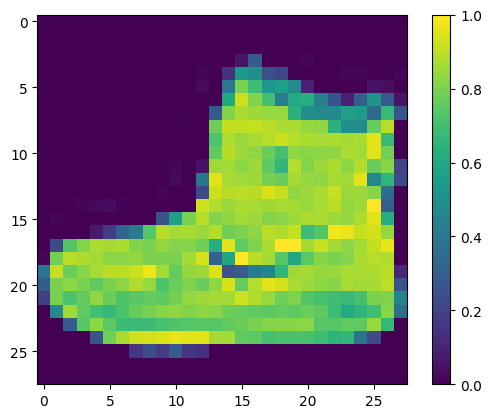

In [7]:
# View image
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

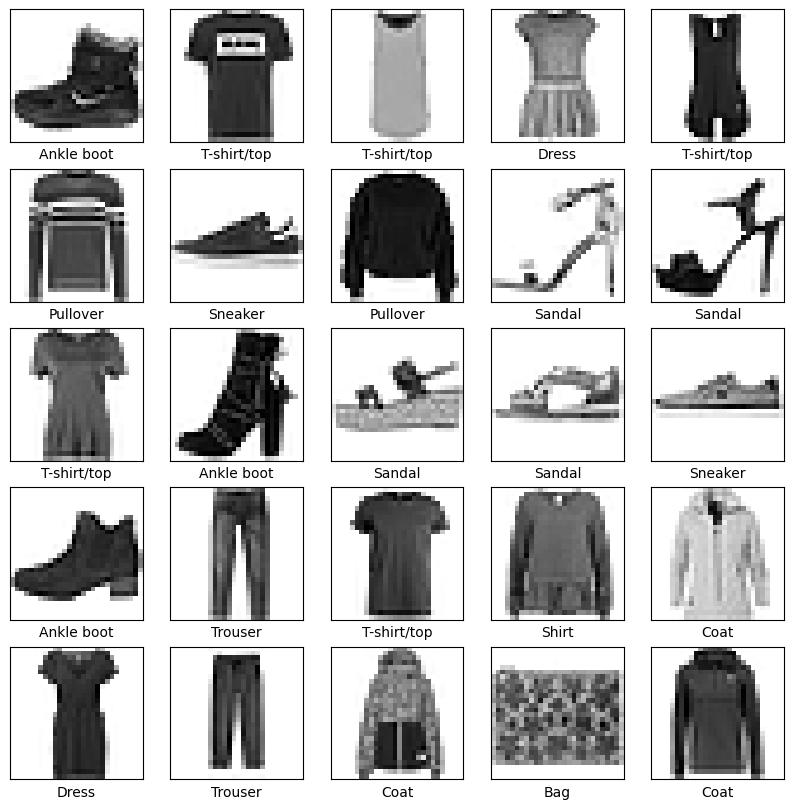

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build and train model

In [ ]:
# One-hot encode labels
train_labels_coded = tf.keras.utils.to_categorical(train_labels, 10)
test_labels_coded = tf.keras.utils.to_categorical(test_labels, 10)

# Build the model
inp = tf.keras.layers.Input(shape=(28, 28))
x = tf.keras.layers.Flatten()(inp)
x = tf.keras.layers.Dense(128, activation="relu")(x)
# x = tf.keras.layers.Dense(128, activation='relu')(x)
out = tf.keras.layers.Dense(10, activation="softmax")(x)

# Define the model
model = tf.keras.Model(inp, out)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["acc"])

# Print model summary
model.summary()

# Train model
history = model.fit(
    train_images,
    train_labels_coded,
    batch_size=16,
    validation_split=0.2,
    verbose=1,
    epochs=50,
)

Epoch 1/50
3000/3000 [==============================] - 3s 813us/step - loss: 0.5030 - acc: 0.8228 - val_loss: 0.4060 - val_acc: 0.8513
Epoch 2/50
3000/3000 [==============================] - 2s 764us/step - loss: 0.3801 - acc: 0.8610 - val_loss: 0.4220 - val_acc: 0.8513
Epoch 3/50
3000/3000 [==============================] - 2s 782us/step - loss: 0.3424 - acc: 0.8749 - val_loss: 0.3631 - val_acc: 0.8691
Epoch 4/50
3000/3000 [==============================] - 2s 719us/step - loss: 0.3163 - acc: 0.8835 - val_loss: 0.3491 - val_acc: 0.8748
Epoch 5/50
3000/3000 [==============================] - 2s 729us/step - loss: 0.2979 - acc: 0.8894 - val_loss: 0.3389 - val_acc: 0.8773
Epoch 6/50
3000/3000 [==============================] - 2s 764us/step - loss: 0.2844 - acc: 0.8937 - val_loss: 0.3316 - val_acc: 0.8813
Epoch 7/50
3000/3000 [==============================] - 2s 742us/step - loss: 0.2699 - acc: 0.8997 - val_loss: 0.3503 - val_acc: 0.8773
Epoch 8/50
3000/3000 [==========================

In [66]:
hist = pd.DataFrame(history.history)
hist.tail()

,loss,acc,val_loss,val_acc
45,0.103285,0.960021,0.577820,0.876917
46,0.102701,0.961500,0.534024,0.890250
47,0.101265,0.962937,0.565881,0.881833
48,0.100486,0.963104,0.559850,0.885500
49,0.096578,0.963958,0.538027,0.886667


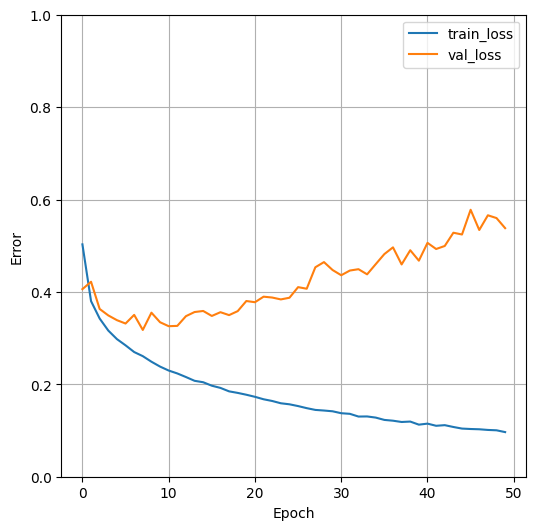

In [67]:
plt.figure(figsize=(6, 6))
plt.plot(hist.loss, label="train_loss")
plt.plot(hist.val_loss, label="val_loss")
plt.ylim([0, 1])
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()

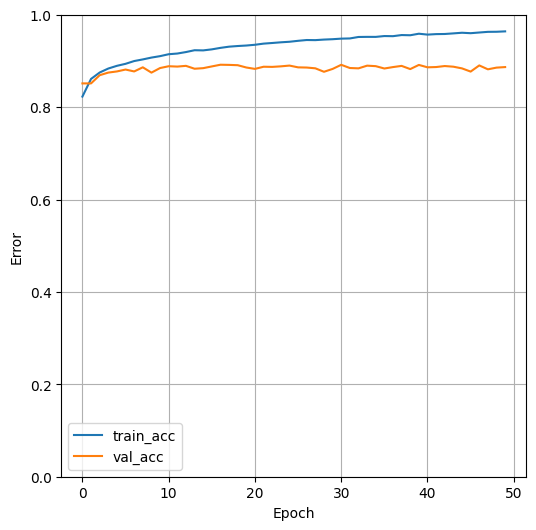

In [68]:
plt.figure(figsize=(6, 6))
plt.plot(hist.acc, label="train_acc")
plt.plot(hist.val_acc, label="val_acc")
plt.ylim([0, 1])
plt.ylabel("Error")
plt.xlabel("Epoch")
plt.grid(True)
plt.legend()
plt.show()

### Making predicitions

In [69]:
predictions = model.predict(test_images)
predictions[0]

313/313 [==============================] - 0s 465us/step


array([2.3584568e-26, 1.7000060e-23, 2.5672131e-31, 1.0749627e-20,
       3.3180093e-35, 1.9317024e-11, 7.4261851e-23, 1.9483901e-08,
       2.8156398e-17, 1.0000000e+00], dtype=float32)

In [70]:
np.argmax(predictions[0])

9

In [71]:
test_labels[0]

9

In [72]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            class_names[predicted_label],
            100 * np.max(predictions_array),
            class_names[true_label],
        ),
        color=color,
    )


def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color("red")
    thisplot[true_label].set_color("blue")

12


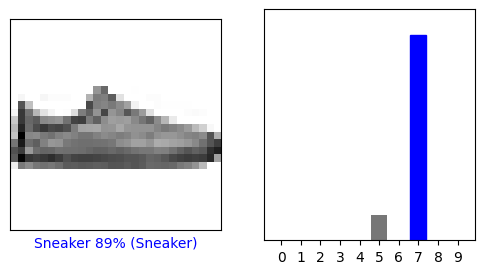

In [138]:
i = np.random.randint(1, 6000)
print(i)
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

In [137]:
predictions[4416]

array([2.4783527e-02, 8.7583095e-01, 2.4375230e-02, 2.9638875e-11,
       6.9461666e-02, 7.6167105e-13, 6.8760064e-04, 4.8408173e-03,
       2.0175812e-05, 1.3814091e-12], dtype=float32)

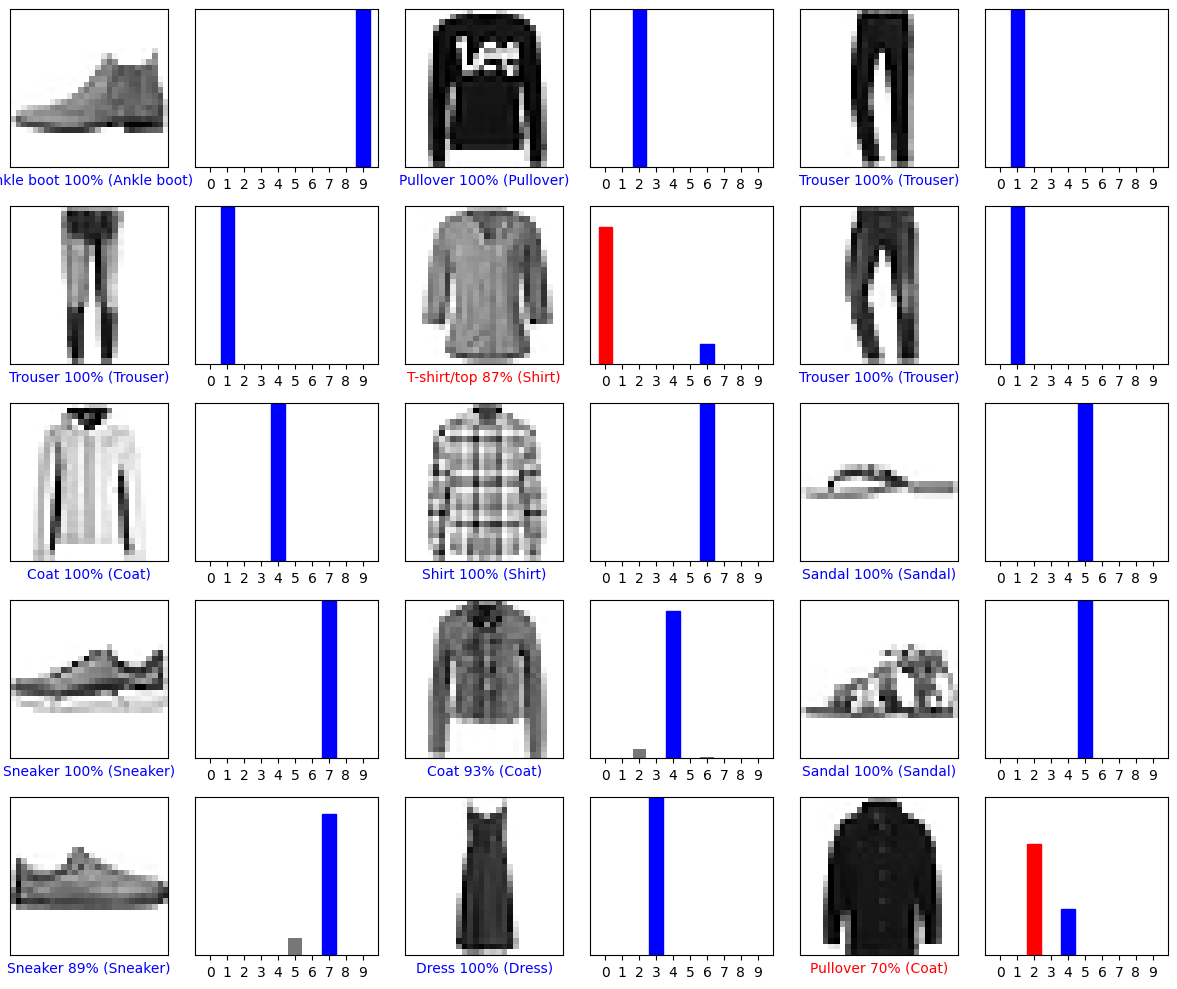

In [141]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### Use the trained model

In [147]:
img = test_images[1]
print(img.shape)

(28, 28)


In [148]:
img = np.expand_dims(img, 0)

print(img.shape)

(1, 28, 28)


In [149]:
predictions_single = model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 16ms/step
[[2.2623259e-04 2.2478610e-30 9.9976796e-01 3.4769243e-22 5.7485222e-06
  1.4848349e-09 1.7121653e-07 4.1736985e-16 1.1838492e-21 1.1084873e-25]]


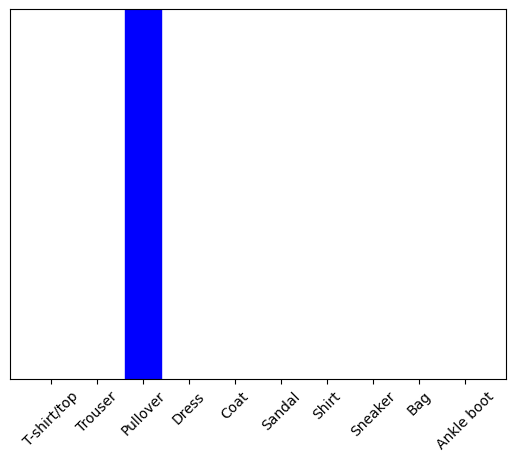

In [150]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [157]:
np.argmax(predictions_single[0])

2